In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("BostonHousing.csv")


df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm

2024-04-22 21:42:52.336544: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 21:42:52.578424: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.4/lib64
2024-04-22 21:42:52.578450: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-22 21:42:52.614165: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-22 21:42:56.206

In [4]:
boston = tf.keras.datasets.boston_housing

In [5]:
boston_data = boston.load_data()

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.2, seed=42)

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [8]:
scaler = StandardScaler()

In [9]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [10]:
model = tf.keras.models.Sequential ([
tf.keras.layers.Input(shape=(13,), name='input-layer'),
tf.keras.layers.Dense(100, name='hidden-layer-2'),
tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
tf.keras.layers.Dense(50, name='hidden-layer-4'),
tf.keras.layers.Dense(1, name='output-layer')
])

2024-04-22 21:44:11.721129: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-22 21:44:11.721167: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pushkar-Nitro-AN515-54): /proc/driver/nvidia/version does not exist
2024-04-22 21:44:11.722089: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model. summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer-2 (Dense)      (None, 100)               1400      
                                                                 
 hidden-layer-3 (BatchNormal  (None, 100)              400       
 ization)                                                        
                                                                 
 hidden-layer-4 (Dense)      (None, 50)                5050      
                                                                 
 output-layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 6,901
Trainable params: 6,701
Non-trainable params: 200
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='mse',metrics=['mae'])

In [13]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20,validation_data=(x_test, y_test))

Epoch 1/20
13/13 [==============================] - 3s 15ms/step - loss: 566.8004 - mae: 22.3710 - val_loss: 1810.1550 - val_mae: 39.4849
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 548.3943 - mae: 22.0489 - val_loss: 1076.5638 - val_mae: 31.4152
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 526.0208 - mae: 21.6226 - val_loss: 823.3973 - val_mae: 27.3274
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 494.0185 - mae: 20.9438 - val_loss: 670.8236 - val_mae: 24.7828
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 441.6286 - mae: 19.8278 - val_loss: 682.8611 - val_mae: 25.1175
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 364.4832 - mae: 17.9472 - val_loss: 341.0956 - val_mae: 17.4843
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 269.0404 - mae: 15.1677 - val_loss: 695.6552 - val_mae: 25.5847
Epoch 8/20
13/13 [===========================

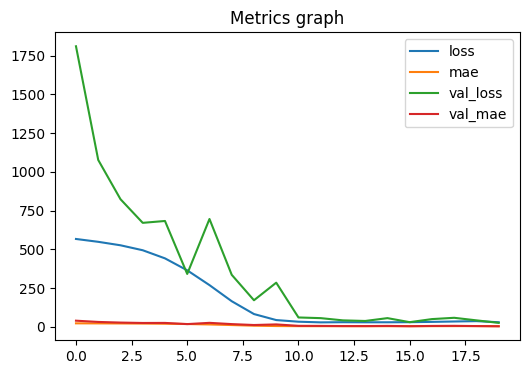

In [14]:
pd.DataFrame(history.history).plot(figsize=(6,4))
plt.title("Metrics graph")
plt.show()

In [15]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


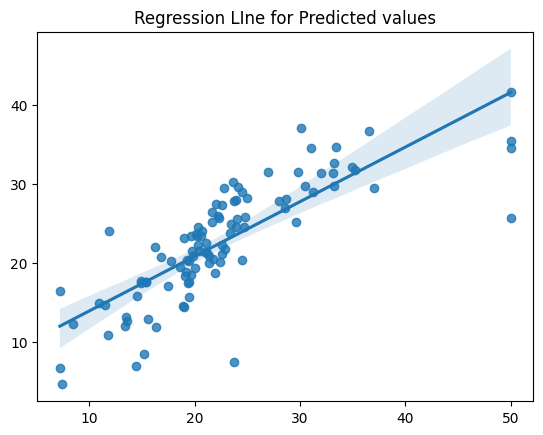

In [16]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression LIne for Predicted values")
plt.show()